# Use Keras Models To Build Neural Networks

Keras là một giao diện lập trình ứng dụng (API) mạng thần kinh cho Python được tích hợp chặt chẽ với TensorFlow, được sử dụng để xây dựng các mô hình học máy. Các mô hình của Keras cung cấp một cách đơn giản, thân thiện với người dùng để xác định một mạng nơ-ron, sau đó sẽ được TensorFlow xây dựng cho bạn. 

# Keras Model Overview - Tổng Quan Về Mô Hình Keras 

Mô hình là thực thể cốt lõi mà bạn sẽ làm việc khi sử dụng Keras. Các mô hình được sử dụng để xác định mạng nơ-ron TensorFlow bằng cách chỉ định các thuộc tính, chức năng và lớp bạn muốn. 

Keras cung cấp một số API mà bạn có thể sử dụng để xác định mạng nơ-ron của mình, bao gồm:

API tuần tự , cho phép bạn tạo mô hình từng lớp cho hầu hết các vấn đề. Nó đơn giản (chỉ là một danh sách đơn giản của các lớp), nhưng nó bị giới hạn ở các ngăn xếp lớp một đầu vào, một đầu ra.
API chức năng , là một API đầy đủ tính năng hỗ trợ các kiến ​​trúc mô hình tùy ý. Nó linh hoạt và phức tạp hơn API tuần tự.
Phân lớp mô hình , cho phép bạn triển khai mọi thứ từ đầu. Thích hợp cho nghiên cứu và các trường hợp sử dụng phức tạp, nhưng ít được sử dụng trong thực tế.

# Cách xác định mạng thần kinh bằng API tuần tự của Keras

API tuần tự là một khuôn khổ để tạo các mô hình dựa trên các phiên bản của lớp sequential () . Mô hình có một biến đầu vào, một lớp ẩn với hai nơ-ron và một lớp đầu ra với một đầu ra nhị phân. Các lớp bổ sung có thể được tạo và thêm vào mô hình.

In [2]:
# thêm thư viện:
from keras.models import Sequential
from keras.layers import Dense

#Xác định mô hình
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Hàm Summary () được sử dụng để tạo và in tóm tắt trong bảng điều khiển Python:

In [4]:
# In ra bản tóm tắt của mô hình đào tạo: 
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 4         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Thêm và xác định nhiều lớp và chuyển chúng 
# vào mô hình Tuần tự dưới dạng một mảng: 

from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])

In [6]:
# Xác định một lớp đơn và thêm nó vào mô hình Tuần tự: 

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

# Cách xác định mạng thần kinh bằng API chức năng của Keras

API chức năng Keras cho phép bạn:

- Xác định nhiều mô hình đầu vào hoặc đầu ra

- Xác định các mô hình chia sẻ các lớp

- Tạo biểu đồ mạng xoay chiều

Các mô hình API chức năng được xác định bằng cách tạo các phiên bản của các lớp và kết nối chúng trực tiếp với nhau theo từng cặp. Sau đó, một mô hình được định nghĩa để chỉ định các lớp hoạt động như đầu vào và đầu ra của mô hình.

# Create an Input Layer - Tạo lớp đầu vào

In [7]:
# Xác định lớp đầu vào:
from keras.layers import Input
visible = Input(shape=(2,))

Các lớp trong mô hình được kết nối theo từng cặp bằng cách chỉ định đầu vào đến từ đâu khi xác định từng lớp mới. Ký hiệu dấu ngoặc được sử dụng, chỉ định lớp đầu vào.

In [8]:
# Kết nối các lớp, sau đó tạo một lớp ẩn dưới dạng Mật độ 
# chỉ nhận đầu vào từ lớp đầu vào: 
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

# Create a Model - Tạo một mô hình

In [9]:
# Xác định mô hình chức năng API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

# How To Use Keras Models To Make Predictions - Cách Sử Dụng Mô Hình Keras Để Đưa Ra Dự Đoán

 Mô hình Tuần tự Keras được triển khai để phù hợp và dự đoán dữ liệu hồi quy

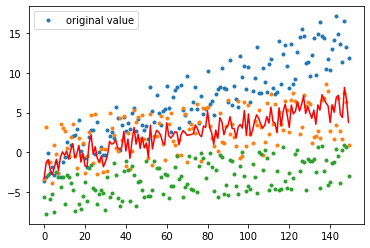

In [10]:
# Chuẩn bị dữ liệu

# Nhập thư viện được yêu cầu trong ví dụ này
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

# Tạo tập dữ liệu mẫu từ dữ liệu ngẫu nhiên: 
random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

N = 150
x,y = CreateDataset(N)
x_ax = range(N)
plt.plot(x_ax, x, 'o', label="original value", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend(['original value'])
plt.show()

In [11]:
# Xác định và xây dựng mô hình Tuần tự, và in bản tóm tắt: 

def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=3,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

BuildModel().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               512       
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


C:\Users\Hp\AppData\Local\Temp\ipykernel_3564\2031542000.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)


50/50 [==============================] - 0s 823us/step
0.07945552797885361


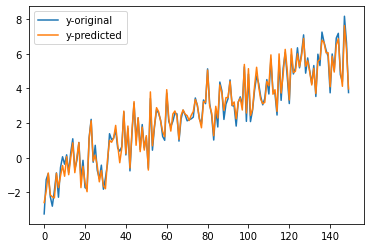

In [12]:
# Điều chỉnh mô hình Tuần tự với API của Scikit-learning Regressor cho Keras: 
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 

y_pred = regressor.predict(x)
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)

plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

5/5 [==============================] - 0s 1ms/step
0.0005044521564043851


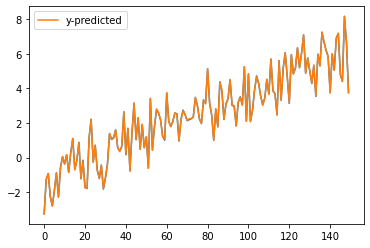

In [15]:
# Điều chỉnh mô hình mà không có trình bao bọc KerasRegressor: 
model = BuildModel()
model.fit(x, y, epochs=100, verbose=False, shuffle=False)
y_krm = model.predict(x)
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)

plt.plot(y)
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

# Khái niệm và thuật ngữ học máy

- Sự chính xác: Tính phần trăm giá trị dự đoán ( yPred ) khớp với giá trị thực (yTrue).
- Hàng loạt: Một bộ gồm N mẫu. Mỗi mẫu trong một lô được xử lý độc lập, song song với các mẫu khác . Thường được gọi là một lô nhỏ.
- Kích thước lô: Số lượng mẫu được xử lý qua mạng cùng một lúc.
- Mạng nơ-ron hợp hiến (CNN hoặc ConvNet): Lớp mạng thần kinh sâu, thường được áp dụng để phân tích hình ảnh trực quan. Lấy cảm hứng từ các quá trình sinh học. 
- Kỷ nguyên: Một lần vượt qua toàn bộ tập huấn luyện vào mạng. Một điểm cắt tùy ý trong đào tạo, được định nghĩa là 'một lần vượt qua toàn bộ tập dữ liệu'.
- GPU: Đơn vị xử lý đồ họa. Nền tảng bộ xử lý TensorFlow cho thấy tính linh hoạt và khả năng lập trình tốt hơn cho các phép tính không thường xuyên, chẳng hạn như các lô nhỏ. Yêu cầu thẻ NVidia CUDA.
- Gradient: Độ dốc của một hàm. Gradient đo lường sự thay đổi của tất cả các trọng số liên quan đến sự thay đổi của sai số. 
- Lớp: Các thể hiện của lớp layer () là các khối xây dựng cơ bản trong mạng nơ-ron Keras. Bao gồm một hàm tính toán tensor-out tensor-in (phương thức gọi của lớp) và một số trạng thái, được tổ chức trong các biến TensorFlow.
- Tổn thất (L): Đo lường khoảng cách các dự đoán của một mô hình so với nhãn của nó. Chỉ số thể hiện mức độ tốt / xấu của một mô hình. Mục tiêu là tìm ra một tập hợp các trọng số và độ lệch để giảm thiểu sự mất mát. Để xác định tổn thất, một mô hình xác định một hàm tổn thất. Các mô hình hồi quy tuyến tính thường sử dụng lỗi bình phương trung bình trong khi các mô hình hồi quy logistic sử dụng Log Loss cho hàm mất mát.

Các chức năng tổn thất có sẵn trong thư viện tổn thất . Một trong hai đối số bắt buộc để biên dịch mô hình Keras. Để nhập thư viện tổn thất , hãy nhập:

In [16]:
from keras import losses

Các chỉ số: Chỉ rõ các tiêu chí đánh giá cho mô hình. Để nhập thư viện số liệu , hãy nhập

In [17]:
from keras import metrics

- Mạng thần kinh: Hệ thống các phương pháp thuật toán để nhận ra các mối quan hệ tiên đoán trong dữ liệu, trong một quá trình bắt chước các mô hình thần kinh của não người.
- Nơron: i xây dựng cơ bản của mạng nơ-ron nhân tạo. Tương tự sinh học của các tế bào thần kinh trong não người, trong đó các tế bào thần kinh (tế bào đóng vai trò là đơn vị cơ bản trong hệ thần kinh thần kinh) gửi / nhận đầu vào và đầu ra.
- Mã hóa một lần: Quy trình trong đó các biến phân loại được chuyển đổi thành một định dạng phù hợp cho dự đoán ML.
- Trình tối ưu hóa: Các chức năng tối ưu hóa / mất mát được sử dụng để giảm thiểu tổn thất. Trình tối ưu hóa được sử dụng để điều chỉnh trọng số đầu vào, bằng cách so sánh dự đoán và hàm mất mát. Để nhập thư viện trình tối ưu hóa , hãy nhập:

In [18]:
from keras import optimizers

- Thứ hạng: Số kích thước trong một tensor. Ví dụ, một đại lượng vô hướng có hạng 0, một vectơ có hạng 1 và một ma trận có hạng 2.
- Mẫu thử: Một phần tử của tập dữ liệu. Ví dụ. Một hình ảnh trong mạng nơ-ron phức hợp. 
- Hình dạng: Liệt kê hoặc nhiều số chứa kích thước của từng chiều của đối tượng tensor. Lớp đầu tiên trong mô hình Tuần tự cần nhận thông tin về 'hình dạng đầu vào' của nó. đối số input_shape tạo một bộ giá trị chứa một phần tử. Ký hiệu hình dạng căng:
+ Teo N-chiều: (D0, D1,…, Dn-1)
+ Bộ căng ma trận có kích thước W x H: (W, H)
+ Căng thẳng vectơ có kích thước W: (W,)

Độ căng: Tổng quát của vectơ và ma trận n chiều và chứa cùng một kiểu dữ liệu, ví dụ. int32 hoặc bool , v.v ... Một tensor Keras là một đối tượng tensor biểu tượng TensorFlow. Tensors là cấu trúc dữ liệu chính trong TensorFlow và trong mạng nơ-ron. (So ​​sánh 'tổng quát' của vectơ trong Keras / TensorFlow với 'tổng' của vectơ trong phép tính tensor.)
Về mặt ký hiệu, cho dù phép tính TensorFlow hay tensor của nó, tensor xảy ra khi có nhiều hơn hai chỉ số được yêu cầu để biểu thị các phần tử trong một đại lượng vô hướng, vectơ hoặc ma trận.

- Bộ xử lý căng (TPU): Máy gia tốc AI có thể lập trình được thiết kế để cung cấp thông lượng số học có độ chính xác thấp cao. Một nền tảng bộ xử lý TensorFlow được tối ưu hóa cao cho các lô lớn và CNN, với thông lượng đào tạo cao. Nền tảng TPU thường bao gồm nhiều thiết bị TPU được kết nối với nhau qua kết nối mạng tốc độ cao chuyên dụng. Có sẵn trên nền tảng Colaboratory (Colab) của Google.
- Biến đổi: Một biến tensorFlow đại diện cho một tensor có giá trị có thể thay đổi bằng cách chạy các hoạt động trên đó. Các hoạt động cụ thể cho phép bạn đọc và sửa đổi các giá trị của một tensor được chỉ định.
- Trọng số và Thành kiến ​​(W & B).
+ Trọng lượng: Tham số đầu vào ảnh hưởng đến đầu ra trong mô hình Keras. 
+ Độ lệch: là một giá trị ngưỡng phụ được thêm vào đầu ra.
+ Trong thống kê chung, trọng số thể hiện sự tăng / giảm tầm quan trọng hoặc độ lớn của một mặt hàng. Trong khi độ lệch là các giá trị tùy ý biểu thị trọng số không chính xác hoặc không mong muốn. 